In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Q. 3.2 
X = np.vstack((np.random.multivariate_normal([2.5, 0.0], np.identity(2), 750), np.random.multivariate_normal([-2.5, 0.0], np.identity(2), 750)))
Y = np.concatenate((np.full((750), -1), np.ones(750)))

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [5]:
def decision_boundary(model, X, Y):
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.arange(X1_min, X1_max, 0.02), np.arange(X2_min, X2_max, 0.02))

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[np.where(Y==-1)[0], 0], X[np.where(Y==-1)[0], 1], label='-1')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    plt.contour(XX, YY, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()

In [6]:
# Gaussian Naive Bayes
# Test accuracies = 99.6%
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB.score(X_test, Y_test)

0.996

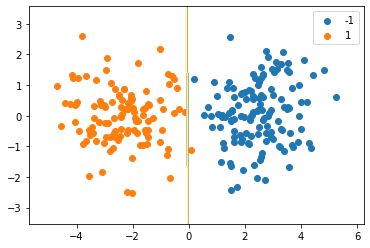

In [7]:
decision_boundary(GNB, X_test, Y_test)

In [8]:
# K Nearest Neighbors
# Test accuracies = 99.6%
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
KNN.score(X_test, Y_test)

0.996

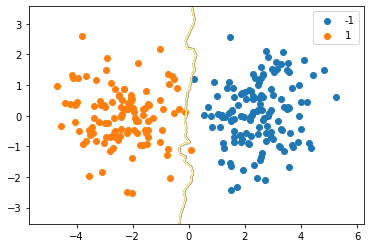

In [9]:
decision_boundary(KNN, X_test, Y_test)

In [10]:
# Q. 3.3

In [51]:
X, Y = make_circles(1500, factor=0.75)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [53]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

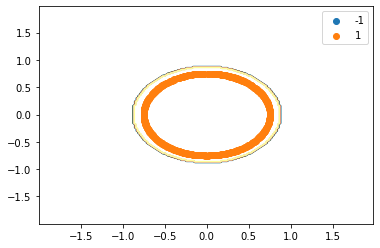

In [57]:
# K Nearest Neighbors
# Test accuracies = 99.6%
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
decision_boundary(KNN, X_train, Y_train)

In [58]:
# K Nearest Neighbors on circles dataset
# Test accuracies = 100%
KNN.score(X_test, Y_test)

1.0

In [59]:
# Q. 3.4

In [61]:
from sklearn.datasets import load_breast_cancer

X, Y = load_breast_cancer(return_X_y=True)
Y[np.where(Y==0)] = -1

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)

In [63]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=95, random_state=1)

In [64]:
# KNN on breast cancer dataset
# Accuracy = 93.68%
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
KNN.score(X_test, Y_test)

0.9368421052631579